### Level order traversal in spiral form

https://www.geeksforgeeks.org/level-order-traversal-in-spiral-form/?ref=next_article

Input:

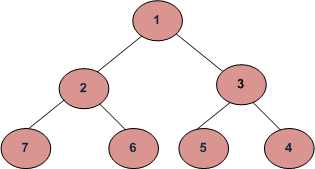

Output: 1 2 3 4 5 6 7

Explanation: 
    Level 1: 1
    Level 2: 2 3
    Level 3: 7 6 5 4
    Nodes are traversed in the alternate order from front or back in adjacent levels , so the output is 1 2 3 4 5 6 7.

Level order traversal of Binary Tree in Spiral form Using Recursion:

The idea is to first calculate the height of the tree, then recursively traverse each level and print the level order traversal according to the current level.

Follow the below steps to Implement the idea:

    Initialize a variable h to store the height of the binary tree.
    Initialize a variable i, and ltr = false.
    Traverse a loop from 1 till h:
        Print the level order traversal of given traversal using below recursive function:
            printGivenLevel(tree, level, ltr)
                if tree is NULL then return;
                if level is 1, then
                    print(tree->data);
                else if level greater than 1, then
                    if(ltr)
                        printGivenLevel(tree->left, level-1, ltr);
                        printGivenLevel(tree->right, level-1, ltr);
                       else
                        printGivenLevel(tree->right, level-1, ltr);
                        printGivenLevel(tree->left, level-1, ltr);
        Update ltr = !ltr
        

In [ ]:
# Python3 program for recursive level order traversal in spiral form

class newNode:
    # Construct to create a newNode
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None

""" Function to print spiral traversal of a tree"""
def printSpiral(root):
    h = height(root)
    """ltr Left to Right. If this variable is set, then the given level is 
    traversed from left to right. """
    ltr = False
    for i in range(1, h + 1):
        printGivenLevel(root, i, ltr)
        """Revert ltr to traverse next level in opposite order"""
        ltr = not ltr

""" Print nodes at a given level """
def printGivenLevel(root, level, ltr):
    if(root == None):
        return
    if(level == 1):
        print(root.data, end=" ")
    elif (level > 1):
        if(ltr):
            printGivenLevel(root.left, level - 1, ltr)
            printGivenLevel(root.right, level - 1, ltr)
        else:
            printGivenLevel(root.right, level - 1, ltr)
            printGivenLevel(root.left, level - 1, ltr)


""" Compute the "height" of a tree -- the number of nodes along the longest
path from the root node down to the farthest leaf node."""
def height(node):
    if (node == None):
        return 0
    else:
        """ compute the height of each subtree """
        lheight = height(node.left)
        rheight = height(node.right)
        """ use the larger one """
        if (lheight > rheight):
            return(lheight + 1)
        else:
            return(rheight + 1)

# Driver Code
if __name__ == '__main__':
    root = newNode(1)
    root.left = newNode(2)
    root.right = newNode(3)
    root.left.left = newNode(7)
    root.left.right = newNode(6)
    root.right.left = newNode(5)
    root.right.right = newNode(4)
    print("Spiral Order traversal of binary tree is")
    printSpiral(root)


Time Complexity: O(N2), where N is the number of nodes in the given tree.
Auxiliary Space: O(N), for recursive stack space.

### Level order traversal of Binary Tree in Spiral form Using Stack:

The idea is to use two separate stacks to store the level order traversal as per their levels in adjacent order.

Follow the below steps to Implement the idea:

    Initialize two stacks s1 and s2
    Push the root of tree in s1
    Initialize a while loop till either s1 or s2 is non-empty
        Initialize a nested while loop till s1 contains nodes
            Initialize temp = s1.top()
            Pop the node from s1
            Print temp -> data
            If temp -> right is not NULL
                Insert temp -> right in s2
            If temp -> left is not NULL
                Insert temp -> left in s2
        Initialize a nested while loop till s2 contains nodes
            Initialize temp = s2.top()
            Pop the node from s2
            Print temp -> data
            If temp -> left is not NULL
                Insert temp -> left in s1
            If temp -> right is not NULL
                Insert temp -> right in s1
                

In [ ]:
# Python3 implementation of a O(n) time method for spiral order traversal
class newNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def printSpiral(root):
    if (root == None):
        return  # None check
    # Create two stacks to store alternate levels
    s1 = []  # For levels to be printed
    # from right to left
    s2 = []  # For levels to be printed
    # from left to right append first level to first stack 's1'
    s1.append(root)
    # Keep printing while any of the stacks has some nodes
    while not len(s1) == 0 or not len(s2) == 0:
        # Print nodes of current level from s1 and append nodes of next level
        # to s2
        while not len(s1) == 0:
            temp = s1[-1]
            s1.pop()
            print(temp.data, end=" ") 
            # Note that is right is appended before left
            if (temp.right):
                s2.append(temp.right)
            if (temp.left):
                s2.append(temp.left)

        # Print nodes of current level from s2 and append nodes of next level to s1
        while (not len(s2) == 0):
            temp = s2[-1]
            s2.pop()
            print(temp.data, end=" ")
            # Note that is left is appended before right
            if (temp.left):
                s1.append(temp.left)
            if (temp.right):
                s1.append(temp.right)

# Driver Code
if __name__ == '__main__':
    root = newNode(1)
    root.left = newNode(2)
    root.right = newNode(3)
    root.left.left = newNode(7)
    root.left.right = newNode(6)
    root.right.left = newNode(5)
    root.right.right = newNode(4)
    print("Spiral Order traversal of",
          "binary tree is ")
    printSpiral(root)


In [ ]:
Time Complexity: O(N), where N is the number of nodes in the binary tree.
Auxiliary Space: O(N), for storing the nodes in the stack.

### Level order traversal of Binary Tree in Spiral form Using Deque:

The idea is to use Doubly Ended Queues, then push and pop the nodes from each end in alternate order.

Follow the below steps to Implement the idea:

    Initialize a deque dq.
    Push root of the binary tree in dq
    Initialize a variable reverse = true
    Initialize a loop while dq is not empty:
        Initialize n = dq.size()
        IF reverse == false:
            Initialize a nested loop while n > 0:
                Decrement n by 1
                If dq.front()->left is not NULL
                    Push dq.front()->left at the back of Deque
                If dq.front()->right is not NULL
                    Push dq.front()->right at the back of Deque
                Print dq.front()->key
                Pop the node from front of the Deque
            Update reverse = !reverse
        Else
            Initialize a nested loop while n > 0:
                Decrement n by 1
                If dq.back()->right is not NULL
                    Push dq.front()->right to the front of Deque
                If dq.back()->left is not NULL
                    Push dq.front()->left to the front of Deque
                Print dq.back()->key
                Pop the node from back of the Deque
            Update reverse = !reverse
            

In [ ]:
# Python3 implementation of above approach

from collections import deque

class newNode:
    def __init__(self, data):
        self.key = data
        self.left = None
        self.right = None

def spiralPrint(root):
    # Declare a deque
    dq = deque()

    # Insert the root of the tree into the deque
    dq.append(root)

    # Create a  variable that will switch in each iteration
    reverse = True

    # Start iteration
    while (len(dq)):

        # Save the size of the deque here itself, as in further steps the size
        # of deque will frequently change
        n = len(dq)

        # If we are printing left to right
        if(not reverse):

            # Iterate from left to right
            while (n > 0):
                n -= 1

                # Insert the child from the back of the deque
                # Left child first
                if (dq[0].left != None):
                    dq.append(dq[0].left)

                if (dq[0].right != None):
                    dq.append(dq[0].right)

                # Print the current processed element
                print(dq[0].key, end="  ")
                dq.popleft()

            # Switch reverse for next traversal
            reverse = not reverse
        else:

            # If we are printing right to left
            # Iterate the deque in reverse order and insert the children
            # from the front
            while (n > 0):
                n -= 1
                # Insert the child in the front of the deque
                # Right child first
                if (dq[-1].right != None):
                    dq.appendleft(dq[-1].right)

                if (dq[-1].left != None):
                    dq.appendleft(dq[-1].left)

                # Print the current processed element
                print(dq[-1].key, end="  ")
                dq.pop()

            # Switch reverse for next traversal
            reverse = not reverse


# Driver Code
if __name__ == '__main__':
    root = newNode(1)
    root.left = newNode(2)
    root.right = newNode(3)
    root.left.left = newNode(7)
    root.left.right = newNode(6)
    root.right.left = newNode(5)
    root.right.right = newNode(4)
    print("Spiral Order traversal of",
          "binary tree is :")
    spiralPrint(root)


Time Complexity: O(N), where N is the number of nodes in the binary tree.
Auxiliary Space: O(N), for storing the nodes in the Deque.